In [1]:
import sys
import os

current_dir = os.path.abspath('')

src_dir = os.path.join(current_dir, '..', 'src')

sys.path.append(src_dir)

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from utils.plotDecisionRegions import plot_decision_regions
from logistic.logisticRegressionGD import LogisticRegressionGD

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # Grab second and third features (petal length and petal width)
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/var/folders/fv/dqslr9qn1w79gjpdq1c2rgxw0000gn/T/ipykernel_78281/3766800682.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi (z)$')


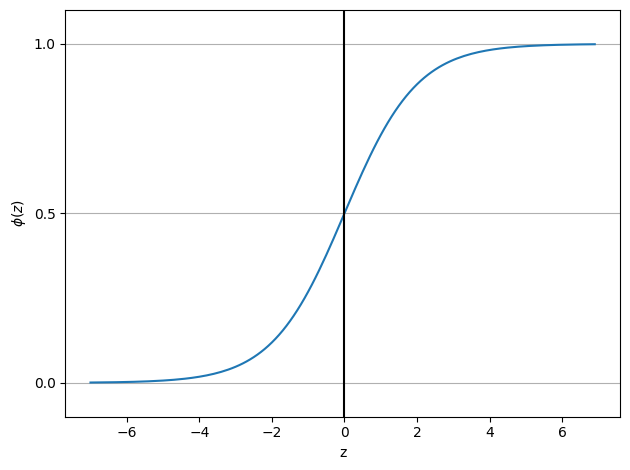

In [2]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

TODO: Explain the sigmoid function and its relationship with converting real number odds to probabilities between 0 and 1

<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
/var/folders/fv/dqslr9qn1w79gjpdq1c2rgxw0000gn/T/ipykernel_78281/611720129.py:15: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi$(z)')


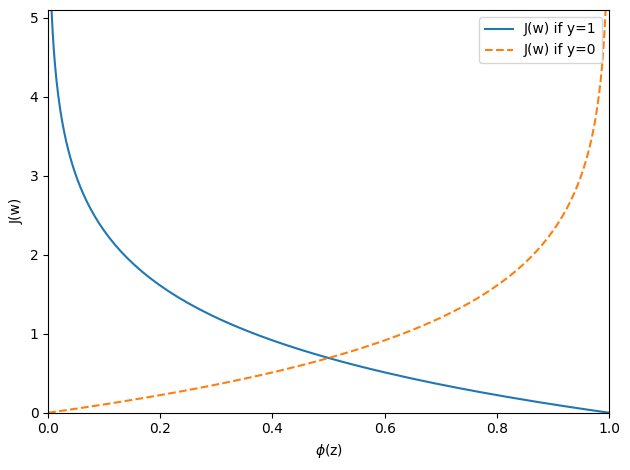

In [3]:
def cost_1(z):
  return - np.log(sigmoid(z))

def cost_0(z):
  return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

TODO: Explain the cost function J and it's relationship between training for probablity 0 & 1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # 30% test data & 70% training data
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


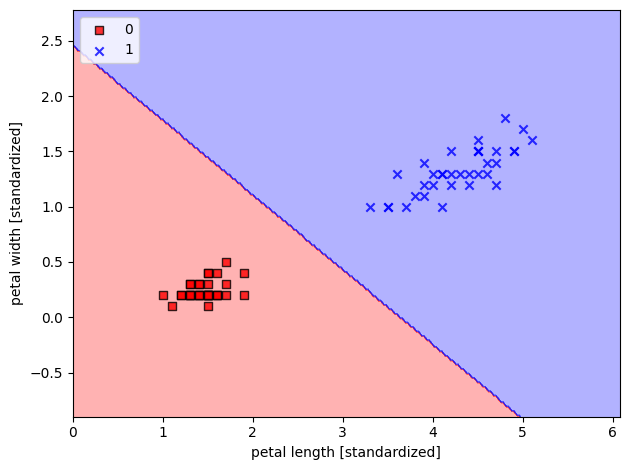

In [5]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/Users/brandonfeist/git/ml/python-machine-learning-book/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


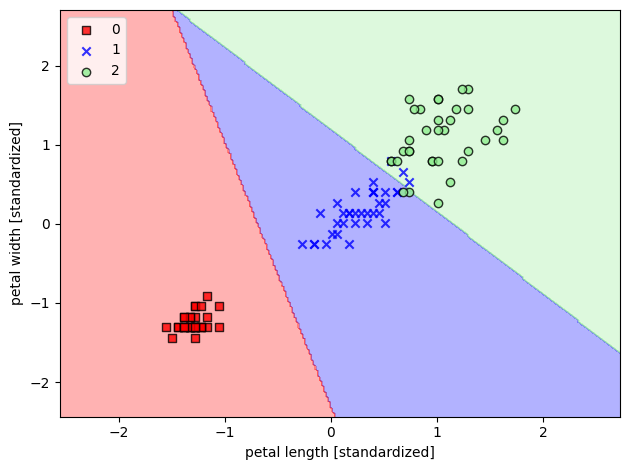

In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, y_train, classifier=lr, test_idx=range(105, 105))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
# Predict probabilities of the three flower samples
print(lr.predict_proba(X_test_std[:3, :]))

# All predicated samples when summed up should be equal to 1
print(lr.predict_proba(X_test_std[:3, :]).sum(axis=1))

# Argmax to get the highest probabilitiy class for each sample
# [2 0 0] first sample is class 2, second and third samples are class 0
print(lr.predict_proba(X_test_std[:3, :]).argmax(axis=1))

# Predict does the same thing as predict_proba + argmax, returning the class label w/ the highest probability
print(lr.predict(X_test_std[:3, :]))

# Predict requires a 2D array, so we need to reshape the 1D array of a single sample predication
print(lr.predict(X_test_std[0, :].reshape(1, -1)))

[[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]
[1. 1. 1.]
[2 0 0]
[2 0 0]
[2]
